In [344]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

Comparing Bronny to NCAA Careers' of 55th NBA Picks since 2000

In [343]:
# prefix to dataset names
draft55_names = ['bronny_james', 'isaiah_wong', 'aaron_wiggins', 'kyle_guy', 
                 'nigel_williams-goss', 'marcus_paige', 'semaj_christon', 
                 'darius_johnson-odom', 'etwaun_moore', 'jeremy_evans', 'patrick_mills',
                 'mike_taylor', 'herbert_hill', 'lawrence_roberts', 'luis_flores',
                 'rick_rickert', 'chris_porter']
datasets = {};

# load in datasets according to prefixes
for i in draft55_names:
    file_path = f"{i}_ncaappg.csv";
    datasets[i] = pd.read_csv(file_path)

In [147]:
# extract variables: points, blocks, assists, turnovers, steals, rebounds
for j in datasets:
    datasets[j] = datasets[j].dropna(subset=['Class'])
    datasets[j] = datasets[j].tail(1)

In [153]:
df = pd.concat(datasets, ignore_index=True)
df['PlayerName'] = draft55_names
df.columns

Index(['Season', 'Team', 'Conf', 'Class', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Awards', 'PlayerName'],
      dtype='object')

Text(0.5, 1.0, 'Percentage of NCAA Classes for 55th Picks in NBA')

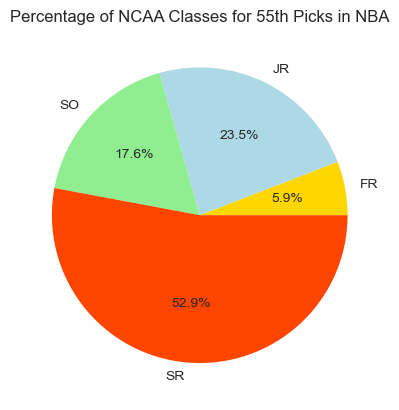

In [149]:
class_counts = df.groupby('Class').size()
class_names = sorted(df['Class'].unique())
plt.pie(class_counts, labels = class_names, 
        autopct='%1.1f%%', 
        colors = ['gold', 'lightblue', 'lightgreen', 'orangered'])
plt.title('Percentage of NCAA Classes for 55th Picks in NBA')

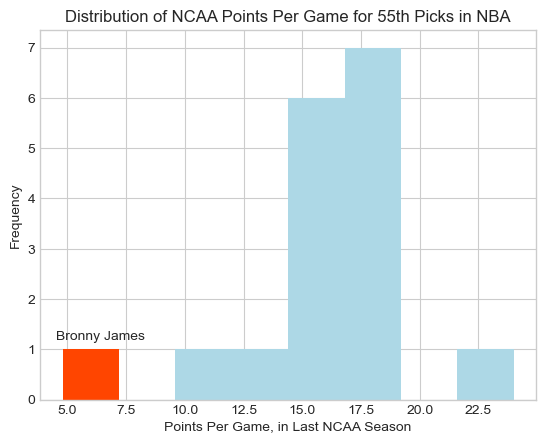

In [150]:
# determine value of Bronny's PPG
highlight_value = df['PTS'][df['PlayerName'] == 'bronny_james'].at[0]

n, bins, patches = plt.hist(df['PTS'], bins = 8, color = 'lightblue')

# determine what bin Bronny is in
for b in range(0, len(bins)):
    if (highlight_value <= bins[0]):
        patch_num = 0
    if (highlight_value > bins[0]):
        b_back = b - 1
        if (highlight_value > bins[b_back]) and (highlight_value <= bins[b]):
            patch_num = b
            
# highlight Bronny's bin        
patches[patch_num].set_fc('orangered')

# annotate name
plt.annotate('Bronny James', xy = (4.5, 1.2))
plt.title('Distribution of NCAA Points Per Game for 55th Picks in NBA')
plt.xlabel('Points Per Game, in Last NCAA Season')
plt.ylabel('Frequency')
plt.style.use('seaborn-whitegrid')

plt.show()

In [169]:
# calculating avg efficiency (PER)
df["PER"] = (df["PTS"] + df["TRB"] + df["AST"] + df["STL"] + df["BLK"] - (df["FGA"] - df["FG"]) - (df["FTA"] - df["FT"]) - df["TOV"])

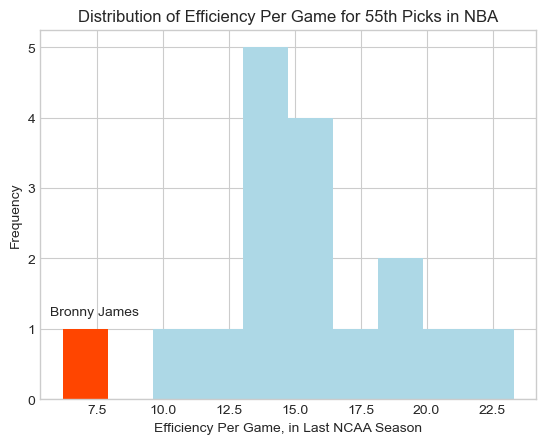

In [166]:
# determine value of Bronny's PER
highlight_value = df['PER'][df['PlayerName'] == 'bronny_james'].at[0]

n, bins, patches = plt.hist(df['PER'], bins = 10, color = 'lightblue')

# determine what bin Bronny is in
for b in range(0, len(bins)):
    if (highlight_value <= bins[0]):
        patch_num = 0
    if (highlight_value > bins[0]):
        b_back = b - 1
        if (highlight_value > bins[b_back]) and (highlight_value <= bins[b]):
            patch_num = b
            
# highlight Bronny's bin        
patches[patch_num].set_fc('orangered')

# annotate name
plt.annotate('Bronny James', xy = (5.7, 1.2))
plt.title('Distribution of Efficiency Per Game for 55th Picks in NBA')
plt.xlabel('Efficiency Per Game, in Last NCAA Season')
plt.ylabel('Frequency')
plt.style.use('seaborn-whitegrid')

plt.show()

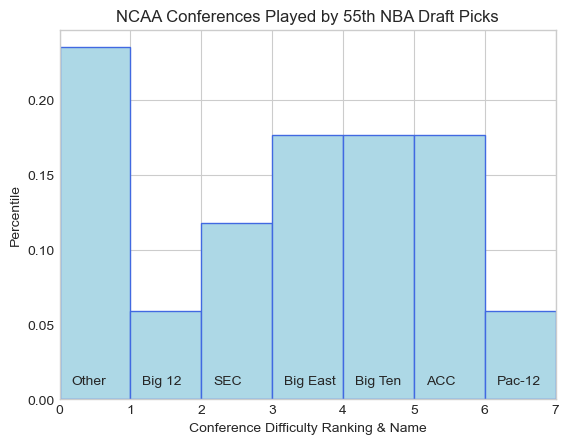

In [251]:
conf_rankings = {"Other":0, "Big 12":1, "SEC":2, "Big East":3, "Big Ten":4, "ACC":5, "Pac-12":6}
conf_rank_keys = list(conf_rankings.keys())
df["conf_rank"] = df["Conf"].map(conf_rankings).fillna(0).astype(int)

plt.xlim(0, 7)
plt.hist(df['conf_rank'], bins = range(min(df['conf_rank']), max(df['conf_rank'])+2), 
         color = 'lightblue', edgecolor = 'royalblue', density=True)

x_coord = 0.17
inc_len = 1
for c in conf_rank_keys:
    plt.annotate(c, xy = (x_coord, 0.01))
    x_coord += inc_len
    
plt.title('NCAA Conferences Played by 55th NBA Draft Picks')
plt.xlabel('Conference Difficulty Ranking & Name')
plt.ylabel('Percentile')
plt.style.use('seaborn-whitegrid')

plt.show()

Predicting Bronny's Rookie Performance? How many years can Bronny be expected to play in the NBA (based on 1st year performance of 55th draft picks)?

In [336]:
# prefix to dataset names
draft55_names_nba = ['bronny_james', 'isaiah_wong', 'aaron_wiggins', 'kyle_guy', 
                 'nigel_williams-goss', 'marcus_paige', 'semaj_christon', 
                 'darius_johnson-odom', 'etwaun_moore', 'jeremy_evans', 'patrick_mills',
                 'mike_taylor', 'lawrence_roberts', 'luis_flores', 'chris_porter']
datasets_nba = {}
nba_predict = {}

# load in datasets according to prefixes
for i in draft55_names_nba:
    file_path = f"{i}_nba.csv";
    datasets_nba[i] = pd.read_csv(file_path)

# get NBA per season data and NBA avg across season data
for j in datasets_nba:
    datasets_nba[j] = datasets_nba[j].dropna(subset=['Team']) # drop rows where player did not play
    datasets_nba[j]['seasons_played'] = len(datasets_nba[j]) # number of seasons played
    datasets_nba[j]["NBA_PER"] = (datasets_nba[j]["PTS"] + datasets_nba[j]["TRB"] + datasets_nba[j]["AST"] + datasets_nba[j]["STL"] + datasets_nba[j]["BLK"] - (datasets_nba[j]["FGA"] - datasets_nba[j]["FG"]) - (datasets_nba[j]["FTA"] - datasets_nba[j]["FT"]) - datasets_nba[j]["TOV"])
    datasets_nba[j] = datasets_nba[j].head(1)[['Age', 'NBA_PER', 'PTS', 'G', 'MP', 'seasons_played']] # subset columns needed
    datasets_nba[j].rename(columns={'Age': 'Rookie_Age', 'NBA_PER': 'Rookie_PER', 
                                    'G':'Rookie_GamesPlayed', 'MP':'Rookie_MinutesPG',
                                    'PTS':'Rookie_PPG'}, inplace=True) # rename columns

df_nba = pd.concat(datasets_nba, ignore_index=True)
df_nba['PlayerName'] = draft55_names_nba

df_nba = pd.merge(df_nba, df[['PlayerName', 'PER', 'GS', 'conf_rank', 'PTS']], on='PlayerName')
df_nba.rename(columns={'PER':'NCAA_PER', 'GS':'NCAA_GS', 'conf_rank':'NCAA_conf_rank', 'PTS':'NCAA_PPG'}, inplace=True)
df_nba['std_NCAA_conf_rank'] = 1/df_nba['NCAA_conf_rank'] # standardize conf rank so that higher rank = lower value
df_nba['std_NCAA_conf_rank'].replace([np.inf, -np.inf], 0, inplace=True) # replace infinities to zeroes

In [337]:
df_nba

,Rookie_Age,Rookie_PER,Rookie_PPG,Rookie_GamesPlayed,Rookie_MinutesPG,seasons_played,PlayerName,NCAA_PER,NCAA_GS,NCAA_conf_rank,NCAA_PPG,std_NCAA_conf_rank
0,20.0,0.6,0.7,6.0,2.7,1,bronny_james,6.2,6.0,6,4.8,0.166667
1,23.0,0.0,2.0,1.0,4.0,1,isaiah_wong,16.2,37.0,5,16.2,0.200000
2,23.0,8.9,8.3,50.0,24.2,4,aaron_wiggins,15.3,30.0,4,14.5,0.250000
3,22.0,0.9,1.3,3.0,3.3,3,kyle_guy,14.6,38.0,5,15.4,0.200000
4,25,1.6,1.4,10.0,5.0,1,nigel_williams-goss,20.4,38.0,0,16.8,0.000000
5,24.0,1.8,2.4,5.0,5.6,1,marcus_paige,12.3,34.0,5,12.6,0.200000
6,24,3.6,2.9,64.0,15.2,1,semaj_christon,14.0,34.0,3,17.0,0.333333
7,23.0,0.3,0.0,4.0,1.5,2,darius_johnson-odom,14.3,33.0,3,18.3,0.333333
8,22.0,2.6,2.9,38.0,8.7,10,etwaun_moore,17.0,33.0,4,18.0,0.250000
9,23,5.3,3.6,49.0,9.4,7,jeremy_evans,16.1,34.0,0,10.0,0.000000


In [330]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [339]:
# want rookie efficiency, age, games played, minutes played, ncaa efficiency, total nba seasons played
X = df_nba[['NCAA_PPG', 'std_NCAA_conf_rank']][df_nba['PlayerName'] != 'bronny_james']
y = df_nba['Rookie_PPG'][df_nba['PlayerName'] != 'bronny_james']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [340]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R² Score

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 1.815497746143915
R²: -15.299059668287207


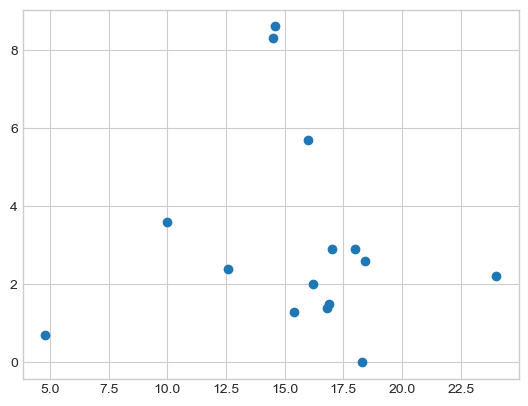

In [338]:
plt.scatter(df_nba['NCAA_PPG'], df_nba['Rookie_PPG'])